# Draft 2 - Capstone

## Stock Price Predictor

### Inputs
* stock symbol of NYSE or NASDAQ
* daily trading data
* past date range for training model
  * range of 1 month or more
  * end date at least 1 month ago
  

#### Trading Data Features
* Opening Price (Open)
* Highest stock trading price (High)
* Number of stock shares traded (Volume)
* Closing price adjusted for splits and dividends (Adjusted Close)

### Processing

#### Parameters
* test date range, after training date range
* prediction date, after test date range

#### Model
* regression model

*TODO: select a model or set of models*

### Output
Predicted Adjusted Close for the prediction date, a specific trading day.

### Metric for Evaluation
Predicted stock price within -/+5% of actual Adjusted Close

_If the prediction date was a day when the stock was not traded (such as a holiday), then the Predicted Adjusted Close will be reported without the comparison percentage._


## Exploration

### Inputs
First, the stock symbol and date range are collected and minimally checked.

The data range will identify the stock data to be used to train the model.

In [1]:
from datetime import datetime

# Stock Symbol - Apple Inc. (AAPL) NASDAQ
stock_symbol = 'aapl'.upper()

# TODO: early moved from 2012 to 2015
# Date range for training data; backwards so courtesy swap flagged
start_date = datetime.strptime('2017-01-01', '%Y-%m-%d')
end_date = datetime.strptime('2015-12-31', '%Y-%m-%d')

# Validate date range; exchange values if invalid range
if (start_date > end_date):
    (start_date, end_date) = (end_date, start_date)

# Adjusted end date one month out
end_date_plus_month = datetime.fromordinal(end_date.toordinal() + 31)

# Check end date plus one month is past today
today = datetime.now()
if (end_date_plus_month > today):
    print('{} is not the minimum 31 days before today {} (end date + 31 = {})'.format(end_date.date(), today.date(),
                                                                                       end_date_plus_month.date()))
elif ((end_date.toordinal()) - (start_date.toordinal()) < 31):
    print('{} to {} is not the minimum 30 days'.format(start_date.date(), end_date.date()))
else:
    print('Stock for price prediction:\n* {}'.format(stock_symbol))
    print('\nTraining data: \n* start date {} \n* end date {}'.format(start_date.date(), end_date.date()))

Stock for price prediction:
* AAPL

Training data: 
* start date 2015-12-31 
* end date 2017-01-01


### Process
Select test date range after training date range, ? before ?
Select prediction date between today's date and test end date.


#### Model
* Regression... TODO

Try multiples

In [2]:
# A random date in test range
import random
test_date = random.randrange(end_date.toordinal(), today.toordinal(), 1)

# Prediction date
prediction_date = datetime.fromordinal(end_date.toordinal() + ((today.toordinal() - end_date.toordinal()) / 2))

# adjust if non-weekday (ordinals 0-4 are M-F): Saturday back one day, Sunday forward one day
if (prediction_date.weekday() == 5):
    prediction_date = datetime.fromordinal(prediction_date.toordinal() - 1)
elif (prediction_date.weekday() == 6):
    prediction_date = datetime.fromordinal(prediction_date.toordinal() + 1)

print('Prediction is {}'.format(prediction_date.date()))
print('The prediction date is a weekday. No adjustment has been made for holidays or stock-specific non-trading day.')
print('The random test date is {}'.format(datetime.fromordinal(test_date).date()))

Prediction is 2017-03-27
The prediction date is a weekday. No adjustment has been made for holidays or stock-specific non-trading day.
The random test date is 2017-01-14


#### Stock Data
Stock data will be downloaded from [Quandl](https:///www.quandl.com).

> "Quandl (/ˈkwɑːndəl/) is a platform for financial, economic, and alternative data that serves investment professionals. Quandl sources data from over 500 publishers. All Quandl's data are accessible via an API. API access is possible through packages for multiple programming languages including R, Python, Matlab, Maple (software) and Stata." [Wikipedia](https://en.wikipedia.org/wiki/Quandl)

In [3]:
import quandl

#token = '' # TODO:  quandl token, .gitignore item

# time series call for pd.DataFrame object
data = quandl.get("WIKI/"+stock_symbol, start_date=start_date, end_date=end_date)

# to pull as a numpy array
# data = quandl.get("WIKI/AAPL", returns="numpy")

In [4]:
data.head()

,Open,High,Low,Close,Volume,Ex-Dividend,Split Ratio,Adj. Open,Adj. High,Adj. Low,Adj. Close,Adj. Volume
Date,,,,,,,,,,,,
2015-12-31,107.01,107.030,104.82,105.26,40912316.0,0.0,1.0,103.807060,103.826461,101.682609,102.109440,40912316.0
2016-01-04,102.61,105.368,102.00,105.35,67649387.0,0.0,1.0,99.538757,102.214207,98.947015,102.196746,67649387.0
2016-01-05,105.75,105.850,102.41,102.71,55790992.0,0.0,1.0,102.584773,102.681780,99.344744,99.635764,55790992.0
2016-01-06,100.56,102.370,99.87,100.70,68457388.0,0.0,1.0,97.550116,99.305941,96.880769,97.685926,68457388.0
2016-01-07,98.68,100.130,96.43,96.45,81094428.0,0.0,1.0,95.726387,97.132987,93.543732,93.563134,81094428.0


In [5]:
# Explore if both NASDAQ and NYSE stock symbol data are available (Quandl), via 'Applied Industrial Technologies' check
nyse_stock_symbol = 'AIT'
nyse_data = quandl.get("WIKI/"+nyse_stock_symbol, start_date=start_date, end_date=end_date)

nyse_data.tail()

,Open,High,Low,Close,Volume,Ex-Dividend,Split Ratio,Adj. Open,Adj. High,Adj. Low,Adj. Close,Adj. Volume
Date,,,,,,,,,,,,
2016-12-23,60.45,61.350,60.2,61.20,150911.0,0.0,1.0,59.890459,60.782128,59.642773,60.633516,150911.0
2016-12-27,61.40,61.650,60.8,60.85,168563.0,0.0,1.0,60.831665,61.079351,60.237219,60.286756,168563.0
2016-12-28,61.05,61.300,59.6,60.05,181645.0,0.0,1.0,60.484905,60.732591,59.048326,59.494161,181645.0
2016-12-29,60.20,60.525,59.6,60.00,116698.0,0.0,1.0,59.642773,59.964764,59.048326,59.444624,116698.0
2016-12-30,59.95,59.950,59.1,59.40,154468.0,0.0,1.0,59.395087,59.395087,58.552955,58.850178,154468.0


In [6]:
test_data = quandl.get("WIKI/"+stock_symbol, start_date=end_date, end_date=prediction_date)
test_data.head() 

,Open,High,Low,Close,Volume,Ex-Dividend,Split Ratio,Adj. Open,Adj. High,Adj. Low,Adj. Close,Adj. Volume
Date,,,,,,,,,,,,
2017-01-03,115.80,116.3300,114.76,116.15,28781865.0,0.0,1.0,114.833750,115.359328,113.802428,115.180830,28781865.0
2017-01-04,115.85,116.5100,115.75,116.02,21118116.0,0.0,1.0,114.883333,115.537826,114.784167,115.051914,21118116.0
2017-01-05,115.92,116.8642,115.81,116.61,22193587.0,0.0,1.0,114.952749,115.889070,114.843667,115.636991,22193587.0
2017-01-06,116.78,118.1600,116.47,117.91,31751900.0,0.0,1.0,115.805573,117.174058,115.498159,116.926144,31751900.0
2017-01-09,117.95,119.4300,117.94,118.99,33561948.0,0.0,1.0,116.965810,118.433461,116.955894,117.997132,33561948.0


In [7]:
# Actual stock data for prediction date
actual_data = quandl.get("WIKI/"+stock_symbol, start_date=prediction_date, end_date=prediction_date)
actual_data

,Open,High,Low,Close,Volume,Ex-Dividend,Split Ratio,Adj. Open,Adj. High,Adj. Low,Adj. Close,Adj. Volume
Date,,,,,,,,,,,,
2017-03-27,139.39,141.22,138.62,140.88,23575094.0,0.0,1.0,138.821908,140.644449,138.055046,140.305835,23575094.0


In [8]:
# Input features dataframe
# test_data[['Open','High', 'Volume','Adj. Close']]

# Review of P4F ch 6 items
# test_data.index
# test_data.columns
# test_data.ix[['2016-12-23']] -- why NaNs
# test_data.ix[test_data.index[1:3]] -- works ['2013-01-02','2013-01-03']
# test_data[['Open','High', 'Volume','Adj. Close']].std()
# test_data[['Open','High', 'Volume','Adj. Close']].mean()

data[['Open','High', 'Volume','Adj. Close']].describe()

,Open,High,Volume,Adj. Close
count,253.000000,253.000000,2.530000e+02,253.000000
mean,104.515099,105.433398,3.844579e+07,102.727382
std,7.571679,7.540072,1.709515e+07,7.949825
min,90.000000,91.670000,1.147592e+07,88.646385
25%,97.320000,98.210000,2.719398e+07,95.053967
50%,105.520000,106.310000,3.379445e+07,103.302789
75%,110.365000,111.510000,4.439276e+07,109.330085
max,118.180000,118.690000,1.333697e+08,116.657871


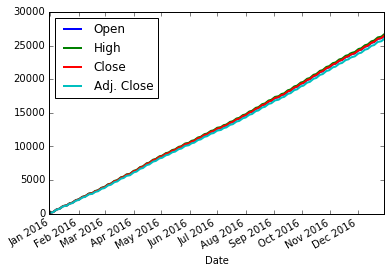

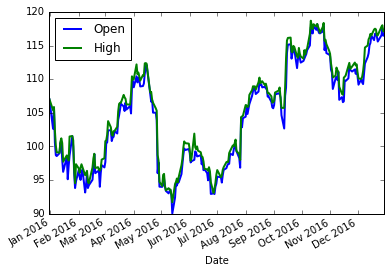

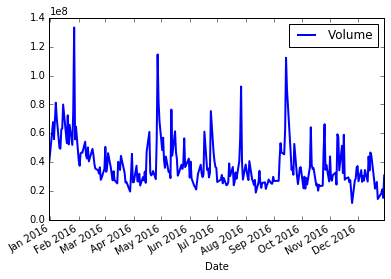

In [9]:
%matplotlib inline
data[['Open','High', 'Close', 'Adj. Close']].cumsum().plot(lw=2.0)

data[['Open','High']].plot(lw=2.0)

data[['Volume']].plot(lw=2.0)

#### Why is the 'Adj. Close' lower than 'Close'
>An adjusted closing price is a stock's closing price on any given day of trading that has been amended to include any distributions and corporate actions that occurred at any time prior to the next day's open. The adjusted closing price is often used when examining historical returns or performing a detailed analysis on historical returns. 
[Investopedia 'What is Adjusted Closing Price](http://www.investopedia.com/terms/a/adjusted_closing_price.asp) 

#### What happened to Apple's stock during June 2014?
Apple stock underwent a 7-to-1 stock split on June 9, 2014 [CNN Money](http://money.cnn.com/2014/06/09/investing/apple-stock-split-reactions/index.html) which is reflected in the adjusted close.

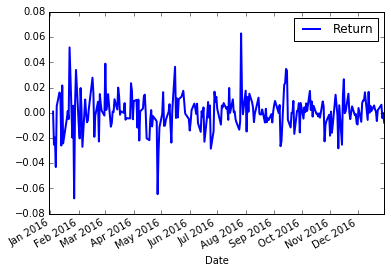

In [10]:
import numpy as np

data['Return'] = np.log(data['Close'] / data['Close'].shift(1))

data[['Return']].plot(lw=2.0)

When examining returns using the close, that data naively shows a large drop on the day of the stock split. 

The adjusted close data shows the clearer indications of returns by accounting for the 7-to-1 stock split and the log return values.

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7fbac62c9cd0>,
       <matplotlib.axes._subplots.AxesSubplot object at 0x7fbac6220890>], dtype=object)

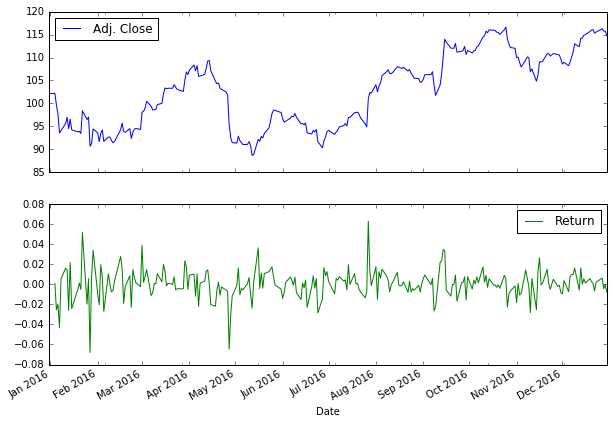

In [11]:
# remove return column based on close
del data['Return']

data['Return'] = np.log(data['Adj. Close'] / data['Adj. Close'].shift(1))

data[['Adj. Close', 'Return']].plot(subplots=True, figsize=(10,7))

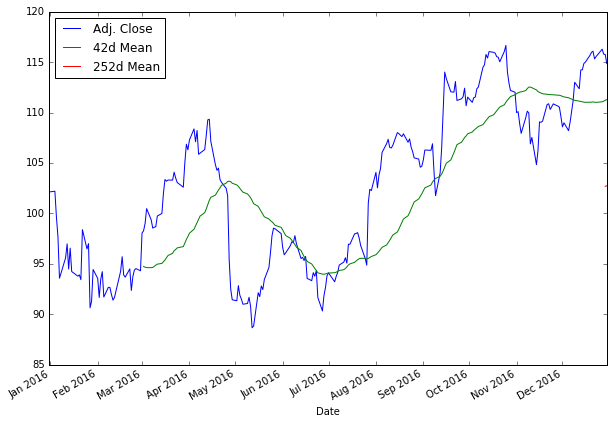

In [12]:
import pandas as pd

data['42d Mean'] = data['Adj. Close'].rolling(window=42, center=False).mean()
data['252d Mean'] = data['Adj. Close'].rolling(window=252, center=False).mean()

data[['Adj. Close', '42d Mean', '252d Mean']].plot(figsize=(10, 7))

#### The Golden Cross
>The golden cross is a bullish breakout pattern formed from a crossover involving a security's short-term moving average (such as the 15-day moving average) breaking above its long-term moving average (such as 50-day moving average) or resistance level. [Investopedia](http://www.investopedia.com/terms/g/goldencross.asp)

For the previous graph, the 'moving average' (or rolling mean) uses 42 and 252 as short and long term values.
* 42 is the typical number of trading days for 2 month period
* 252 is the typical number of trading days in a 1 year

It may be noted there are varied opinions on the value of the Golden Cross as a technical trading tool:
* http://www.stockopedia.com/content/trading-the-golden-cross-does-it-really-work-69694/
* http://www.cnbc.com/2017/05/22/golds-golden-cross-the-metal-just-formed-a-chart-pattern-that-can-signal-a-breakout.html
* http://www.cnbc.com/2016/04/26/looks-like-the-golden-cross-isnt-so-golden-after-all.html

In [13]:
X = data[['Open','High', 'Volume']]
y = data[['Adj. Close']]

In [14]:
# Explore like BigData MadeSimple linear regression example
from sklearn.linear_model import LinearRegression
linear_model = LinearRegression()
linear_model.fit(X,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [15]:
print('Estimated intercept coefficient {}'.format(linear_model.intercept_))
print('Number of coefficients {}'.format(len(linear_model.coef_[0])))
pd.DataFrame(zip(X.columns, linear_model.coef_[0]), columns=['Features', 'Coeff'])

Estimated intercept coefficient [-4.93757668]
Number of coefficients 3


,Features,Coeff
0,Open,-2.340081e-01
1,High,1.263563e+00
2,Volume,-2.859719e-08


In [16]:
actual_adj_close = actual_data[['Adj. Close']].iloc[0]['Adj. Close']
predicted_y = linear_model.predict(actual_data[['Open','High','Volume']])
print('Predicted Adj. Close {} vs actual Adj. Close {}; within {:.2f}% of actual'.format(predicted_y[0][0], actual_adj_close,
                                                                             ((predicted_y[0][0] - actual_adj_close) / actual_adj_close)*100))

Predicted Adj. Close 140.210271196 vs actual Adj. Close 140.305835166; within -0.07% of actual


In [17]:
num_test = 0.2
X_train = None
X_test = None
y_train = None
y_test = None
random_state = 42

from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=num_test, random_state=random_state)

linear_model.fit(X_train,y_train)
pred_train = linear_model.predict(X_train)
pred_test = linear_model.predict(X_test)

In [18]:
predicted_y = linear_model.predict(actual_data[['Open','High','Volume']])
print('Predicted Adj. Close {} vs actual Adj. Close {}; within {:.2f}% of actual'.format(predicted_y[0][0],
                                                                                         actual_adj_close,
                                                                             (( predicted_y[0][0] - actual_adj_close) / actual_adj_close)*100))

Predicted Adj. Close 140.233539419 vs actual Adj. Close 140.305835166; within -0.05% of actual


In [19]:
# The coefficients
print('Coefficients: {}'.format(linear_model.coef_))
# The mean squared error
print("Mean squared error: {%.2f}" % np.mean((linear_model.predict(X_test) - y_test) ** 2))
# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % linear_model.score(X_test, y_test))

Coefficients: [[ -1.89045296e-01   1.22102140e+00  -2.78322110e-08]]
Mean squared error: {0.77}
Variance score: 0.99


In [ ]:
#from sklearn.linear_model import LogisticRegression 
#logreg_model = LogisticRegression(random_state=random_state)

#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=num_test, random_state=random_state)

#logreg_model.fit(X_train, y_train.values)
#pred_train = logreg_model.predict(X_train)
#pred_test = logreg_model.predict(X_test)

#predicted_y = logreg_model.predict(actual_data[['Open','High','Volume']])
#print('Predicted Adj. Close {} vs actual Adj. Close {}; within {:.2f}% of actual'.format(predicted_y[0][0],
#                                                                                         actual_adj_close,
#                                                                             (( predicted_y[0][0] - actual_adj_close) / actual_adj_close)*100))
#y_test.values

In [20]:
# http://scikit-learn.org/stable/auto_examples/svm/plot_svm_regression.html
from sklearn.svm import SVR

svr_rbf = SVR(kernel='rbf', C=1e3, gamma=0.1)
#svr_lin = SVR(kernel='linear', C=1e3)
#svr_poly = SVR(kernel='poly', C=1e3, degree=2)

# y is data[['Adj. Close']]
y_val_ravel = y.values
y_val_ravel = y_val_ravel.ravel()

y_rbf = svr_rbf.fit(X, y_val_ravel).predict(X)
#y_lin = svr_lin.fit(X, y).predict(X)
#y_poly = svr_poly.fit(X, y_val_ravel).predict(X)

In [ ]:
#svr_lin = SVR(kernel='linear', C=1e2)

#y_lin = svr_lin.fit(X, y_val_ravel).predict(X)

In [ ]:
lw = 2
plt.scatter(X, y, color='darkorange', label='data')
plt.hold('on')
plt.plot(X, y_rbf, color='navy', lw=lw, label='RBF model')
#plt.plot(X, y_lin, color='c', lw=lw, label='Linear model')
#plt.plot(X, y_poly, color='cornflowerblue', lw=lw, label='Polynomial model')
plt.xlabel('data')
plt.ylabel('target')
plt.title('Support Vector Regression')
plt.legend()
plt.show()